<img src="../images/QISKit-c.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

## _*Working with coupling maps*_ 


***
### Contributors
Andreas Fuhrer, Andrew Cross, Chris Wood and Sarah Sheldon


#### Demonstrates the use of `qiskit.tools.layouts` for extending the `Coupling` class
- Updates the definition of the `Coupling` class in `qiskit.mapper._coupling` and adds methods to save, plot and generate coupling maps.
- Adds the methods `gen_map`, `get_dict`, `plot`, `fexport` and `fimport`.
- Adds the data structures `pos`, `name`, `description`.

#### Requirements:

*Graphviz* makes much better arrangements of circuit graphs but is only required if automatic layouting of the nodes is used. *Pygraphviz* is the python interface to *graphviz* and part of Anaconda and *networkx* supports it. If *pygraphviz* is not present then the layout routines in *networkx* are used.


### Load the Extensions to the Coupling class

`import qiskit.tools.layouts` to extend the Coupling class.

In [1]:
from qiskit.mapper._coupling import Coupling

# print out all the attributes in the Coupling class
ss = 'Coupling class attributes are: '
for ii in Coupling.__dict__.keys():
    ss += ii
    ss += ", "
print(ss[:-2])
print("")

import qiskit.tools.layouts

# now do it again after updating the class
ss = 'Coupling class attributes are: '
for ii in Coupling.__dict__.keys():
    ss += ii
    ss += ", "
print(ss[:-2])


Coupling class attributes are: __module__, __doc__, __init__, size, get_qubits, get_edges, add_qubit, add_edge, connected, compute_distance, distance, __str__, __dict__, __weakref__

Coupling class attributes are: __module__, __doc__, __init__, size, get_qubits, get_edges, add_qubit, add_edge, connected, compute_distance, distance, __str__, __dict__, __weakref__, get_dict, plot, __clear, __linear, __circle, __rect, __torus, __ibmqx, __ibmq, fexport, fimport, gen_map


Manual definition and usage of the Coupling class still work and should remain fully compatible.

Position information before plotting: None


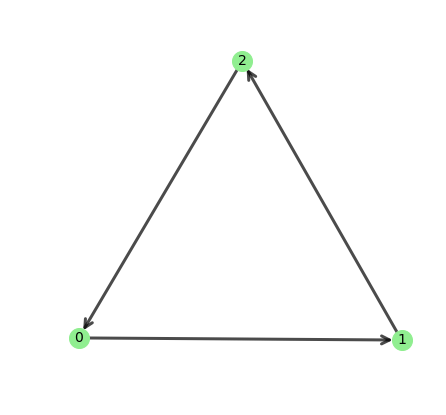

Position information after plotting: [[-0.87499698 -0.49429392]
 [ 0.86713152 -0.50570608]
 [ 0.00786426  1.        ]]


In [2]:
ff = Coupling()
ff.add_qubit(("q",0))
ff.add_qubit(("q",1))
ff.add_qubit(("q",2))
ff.add_edge(("q",0),("q",1))
ff.add_edge(("q",1),("q",2))
ff.add_edge(("q",2),("q",0))
print("Position information before plotting: " + str(ff.pos))
ff.plot()
print("Position information after plotting: " + str(ff.pos))


If there is no positional information for the qubits in the layout, `pygraphviz` is used to generate the layout.
If `pygraphviz` is not present then `networkx.drawing.layout.spring_layout` is used.
However the qubit positions can also be given manually:

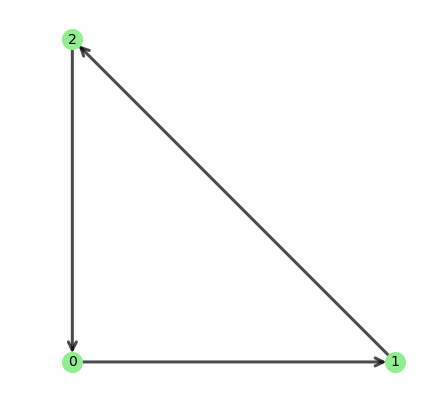

In [3]:
ff.pos = [[-0.5, -0.5], [ 0.5, -0.5], [ -0.5,  0.5 ]]
ff.plot()

Let's load a standard layout from the quantum experience

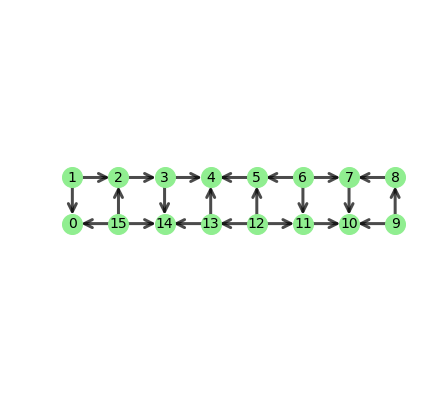

In [4]:
ff.gen_map(layout = "ibmqx5")
ff.plot()

The same thing can be done directly when the class is instantiated. Let's try the 20 qubit commertial chip:

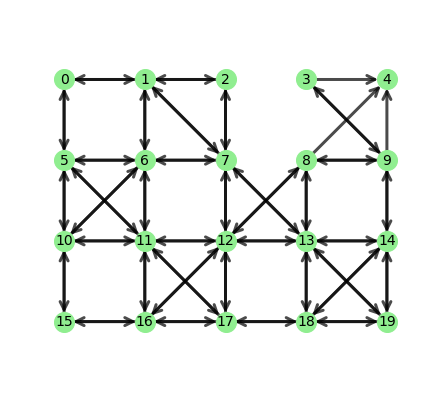

In [5]:
gg = Coupling(layout = "ibmq1")
gg.plot()

Or we can prepare a custom topology with or without the positional arguments:

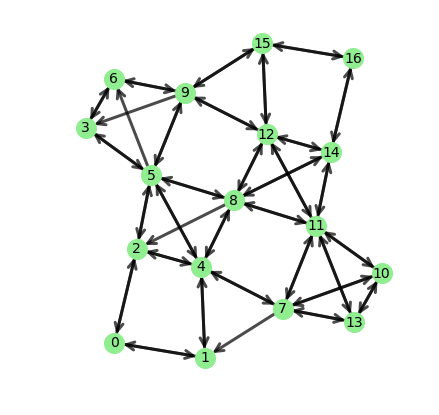

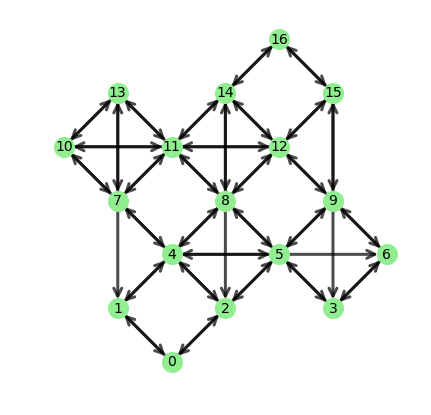

In [6]:
# 17 qubit layout
cmap = {0: [1, 2],
    1: [0, 4], 
    2: [0, 4, 5], 
    3: [5, 6],
    4: [1, 2, 5, 7, 8],
    5: [2, 3, 4, 6, 8, 9], 
    6: [3, 9],
    7: [1, 4, 10, 11, 13], 
    8: [2, 4, 5, 11, 12, 14], 
    9: [3, 5, 6, 12, 15], 
    10: [7, 11, 13],
    11: [7, 8, 10, 12, 13, 14], 
    12: [8, 9, 11, 14, 15], 
    13: [7, 10, 11],
    14: [8, 11, 12, 16],
    15: [9, 12, 16],
    16: [14, 15]}
pos = [[0,0],[-1,1],[1,1],[3,1],[0,2],[2,2],[4,2],[-1,3],[1,3],[3,3],[-2,4],[0,4],[2,4],[-1,5],[1,5],[3,5],[2,6]]
# define an instance just with the coupling map
ff = Coupling(cmap)
ff.plot()
# define an instance with both coupling map and layout positions of the qubits. 
# Note that all arguments except the coupling map need to be named arguments
gg = Coupling(cmap, pos = pos)
gg.plot()

Save the coupling layout from instance `gg` to disc and load it into instance `ff`

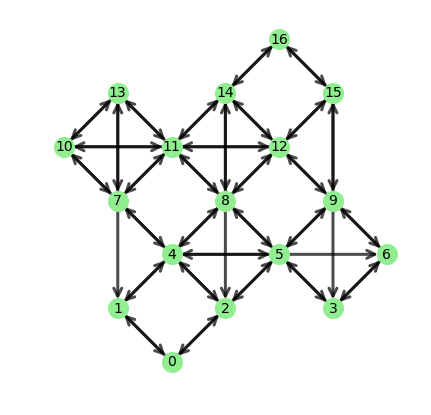

In [7]:
gg.fexport("17qubit_logical")
ff.fimport("17qubit_logical")
ff.plot()

The following standard layouts are available as of now with the corresponding parameters:
``` 
 "linear"  : n, order
 "circle"  : n, order
 "rect"    : n_right, n_down, order, defects
 "torus"   : n_right, n_down, order, defects
 "ibmqx2"  : -
 "ibmqx3"  : -
 "ibmqx4"  : -
 "ibmqx5"  : -
 "ibmq1"   : -
 
           n  : number of qubits in coupling map
      n_right : number of qubits horizontally 
       n_down : number of qubits vertically
        order : orientation of the coupling (float between 0.0  and 1.0).
                For a value of 0.0 the qubits are coupled from right to left.
                For a value of 1.0 the qubits are coupled from left to right.
                For values 0.0 < order < 1.0 random couplings are chosen with
                probability of left-to-right given by 'order'.
      defects : number of defects to introduce in the lattice.
                A negative number of 'defects' will attempt to remove as many random links (< = abs(defects))
                as possible without isolating any qubit from the lattice.
                A positive number of 'defects' will add links to the lattice randmomly until either
                all-to-all connectivity is reached or the number of added links reaches 'defects'
```

#### Examples

First a 6x4 qubit layout with random directions of cx couplings and three missing links:

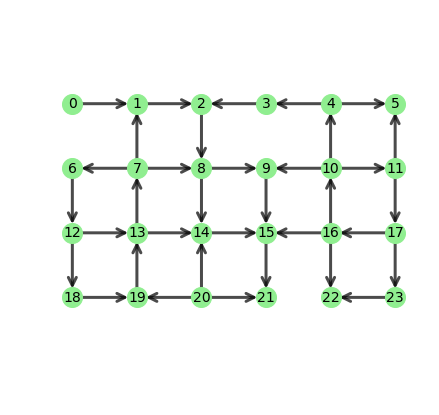

In [8]:
ff = Coupling(layout = "rect", n_right = 6, n_down = 4, order = 0.5 , defects = -3)
ff.plot()

A 15 qubit circular linear layout with random cx orientations:

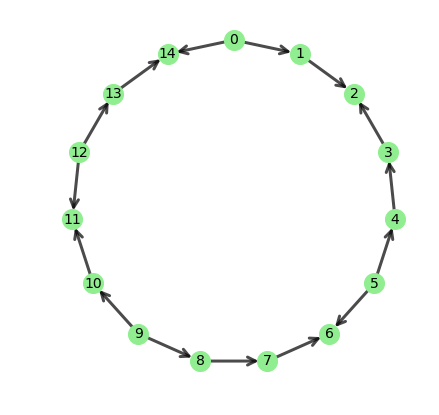

In [9]:
ff = Coupling(layout = "circle", n = 15, order = 0.5 )
ff.plot()

A toroidal coupling map with 10 x 5 qubits with automatic layout of the qubit positions:

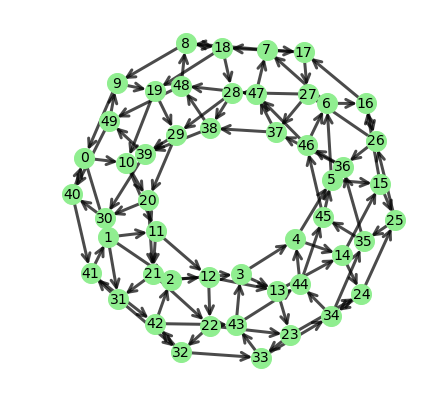

In [10]:
ff = Coupling(layout = "torus", n_right = 10, n_down = 5, order = 1. , defects = 0)
ff.pos = None #the predefined positions make it hard to see the torus
ff.plot()

Linear qubit layout with a preferential cx direction from left to right:

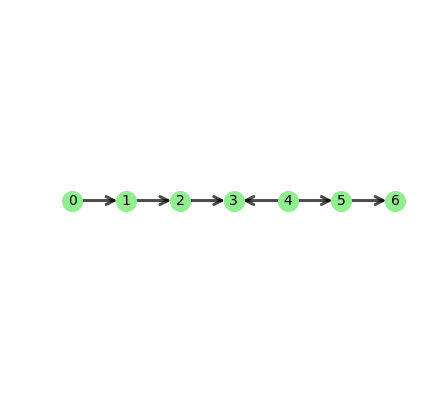

In [11]:
cc = Coupling(layout = "linear", n = 7, order = 0.8)
cc.plot()

In [12]:
%run "../version.ipynb"

Package,Version
QISKit,0.4.8
IBMQuantumExperience,>= 1.8.26
numpy,">= 1.13, < 1.14"
scipy,">= 0.19, < 0.20"
matplotlib,">= 2.0, < 2.1"
